Streaming output truncated to the last 5000 lines.
|    value_loss           | 14           |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 284         |
|    ep_rew_mean          | 264         |
| time/                   |             |
|    fps                  | 345         |
|    iterations           | 252         |
|    time_elapsed         | 1492        |
|    total_timesteps      | 516096      |
| train/                  |             |
|    approx_kl            | 0.004266757 |
|    clip_fraction        | 0.0384      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.475      |
|    explained_variance   | 0.851       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.69        |
|    n_updates            | 2510        |
|    policy_gradient_loss | -0.00493    |
|    value_loss           | 37.3        |
-----------------------

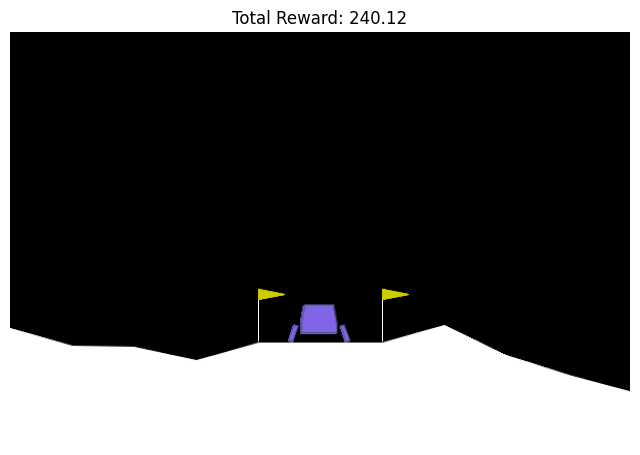

In [55]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Create the Lunar Lander environment with render_mode='rgb_array'
env = gym.make('LunarLander-v3', render_mode='rgb_array')

# Define the RL agent (PPO)
model = PPO("MlpPolicy", env, verbose=1)

# Train the model (for 1 million timesteps)
model.learn(total_timesteps=1000000)

# Set up the figure and axis for plotting the animation
fig, ax = plt.subplots(figsize=(8, 6))

# This function will update the plot with each new frame
def update(frame):
    global obs, done, episode_reward

    if done:
        return []

    # Get action from the trained agent
    action, _states = model.predict(obs)

    # Perform the action in the environment
    obs, reward, done, truncated, info = env.step(action)

    # Accumulate reward
    episode_reward += reward

    # Capture the current frame (using render_mode='rgb_array')
    img = env.render()

    # Display the current frame on the plot
    ax.clear()  # Clear the axis for the next frame
    ax.imshow(img)  # Display the new frame
    ax.axis('off')  # Hide axes
    ax.set_title(f"Total Reward: {episode_reward:.2f}")

    return [ax.imshow(img)]

# Function to create the animation for one full episode
def run_animation():
    global obs, done, episode_reward
    # Reset environment for a new episode
    obs, info = env.reset()
    done = False
    episode_reward = 0

    # Create the animation using FuncAnimation
    anim = FuncAnimation(fig, update, frames=2000, interval=30, repeat=False)  # Frame count can be adjusted

    # Save the animation as a video file (mp4 format)
    anim.save("/content/lunar_lander_complete.mp4", writer='ffmpeg', fps=30)

    # Display the animation in the notebook using IPython's Video class
    return Video("/content/lunar_lander_complete.mp4", embed=True, width=800)

# Evaluate the trained agent for 1 episode and create a complete lunar landing animation
display(run_animation())

# Close the environment after evaluation
env.close()

